# Центральная предельная теорема своими руками

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

# Определяем распределение Парето


 Про распределение Парето можно почитать, например, тут

Среднее:  𝐸[𝑥]=𝑥(𝑚)𝑘𝑘−1 , где  𝑥(𝑚) -минимальное значение (в scipy.pareto по умолчанию  𝑥(𝑚)=1 ), а k -> это параметр b - "коэффициент кривизны")

Дисперсия:  𝐷[𝑥]=(𝑥(𝑚)𝑘𝑘−1)2(𝑘𝑘−2)=𝐸[𝑥]2(𝑘𝑘−2)  , при k > 2. В расчетах используем k = 3 чтобы иметь возможность определить дисперсию.

In [1]:
#посчитаем среднее и дисперсию
xm=1.#минимальное значение
k=3.# k -> это параметр b - "коэффициент кривизны"
E=(xm*k)/(k-1)#среднее(мат ожидание)
D=(E**2)*(k/(k-2))#дисперсия

Отсюда получаем значения:

𝐸[𝑥]=1.5

𝐷[𝑥]=6.75

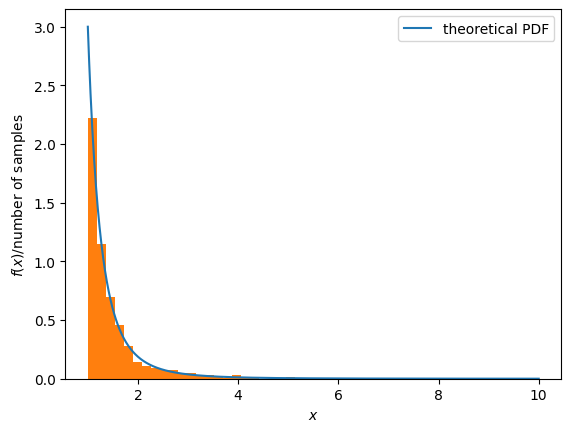

In [3]:
#генерируем выборку объема 1000
pareto = sts.pareto(b=3)#задаем функцию
sample = pareto.rvs(1000)#генерим случайную выборку 1000 значений
x = np.linspace(1,10,1000)#определяем массив точек для построения плотности распределения
pdf = pareto.pdf(x)#вычисляем значения плотности распределения от выборки
#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, bins =50, range=(1,10), density=True)
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

## Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

## при n = 5

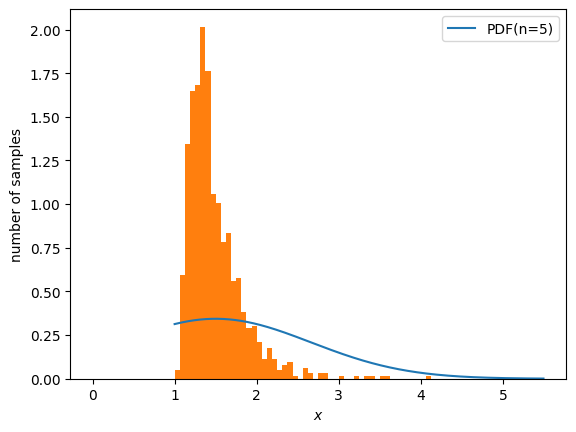

In [4]:
n=5
sample5=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample5i = pareto.rvs(n)#генерация выборки
    mean5i=sum(sample5i)/n#определение выборочного среднего (в.с.)
    sample5=np.append(sample5,mean5i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=5
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D5=D/n#дисперсия для нормального распределения приближающего выборку средних
sigma5=math.sqrt(D5)#сигма для нормального распределения выборки средних
norm5 = sts.norm(E, sigma5)#определяем нормальное распределение с расчетными характеристиками Парето
pdf5 = norm5.pdf(x[:500])#получаем плотность распределения
#строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.plot(x[:500], pdf5, label='PDF(n=5)')
plt.hist(sample5, bins =80, range=(0,5), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')


### при n = 30

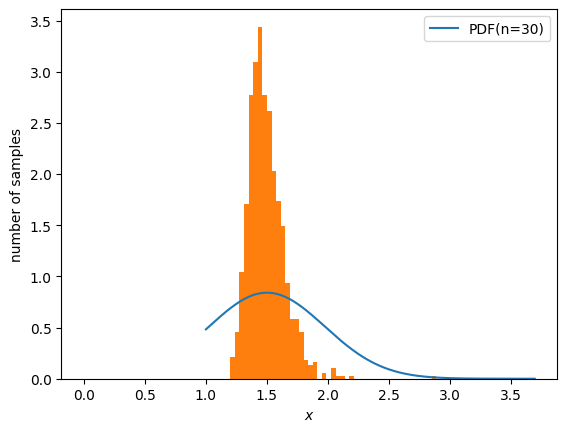

In [8]:
n=30
sample30=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample30i = pareto.rvs(n)#генерация выборки
    mean30i=sum(sample30i)/n#определение выборочного среднего (в.с.)
    sample30=np.append(sample30,mean30i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=30
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D30=D/n#дисперсия для нормального распределения приближающего выборку средних
sigma30=math.sqrt(D30)#сигма для нормального распределения выборки средних
norm30 = sts.norm(E, sigma30)#определяем нормальное распределение с расчетными характеристиками Парето
pdf30 = norm30.pdf(x[:300])#получаем плотность распределения
#строим гистограмму массива средних при n=30 и плотность описывающую этот массив нормального распределения
plt.plot(x[:300], pdf30, label='PDF(n=30)')
plt.hist(sample30, bins =80, range=(0,3), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

### при n = 100

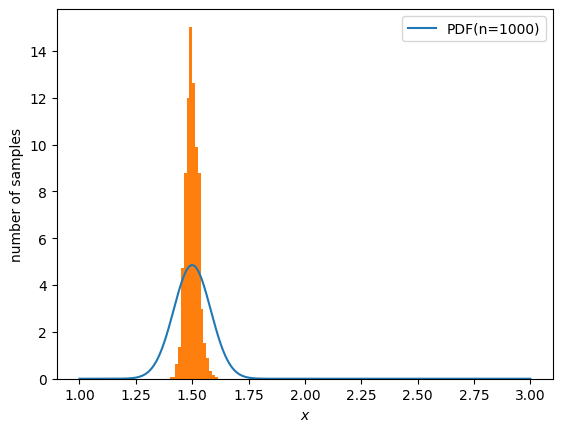

In [10]:
n=1000
y = np.linspace(1,3,1000)
sample1000=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample1000i = pareto.rvs(n)#генерация выборки
    mean1000i=sum(sample1000i)/n#определение выборочного среднего (в.с.)
    sample1000=np.append(sample1000,mean1000i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=1000
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D1000=D/n#дисперсия для нормального распределения выборки средних
sigma1000=math.sqrt(D1000)#сигма для нормального распределения выборки средних
norm1000 = sts.norm(E, sigma1000)#определяем нормальное распределение с расчетными характеристиками Парето
pdf1000 = norm1000.pdf(y)#получаем плотность распределения
#строим гистограмму массива средних при n=1000 и плотность описывающую этот массив нормального распределения
plt.plot(y, pdf1000, label='PDF(n=1000)')
plt.hist(sample1000, bins =80, range=(1,2), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

Для выполнения задания была использована функция распределения Парето, выбранная случайным образом из списка, доступного в библиотеке SciPy. Задача включала в себя построение четырех различных выборок для значений n равных 5, 30, 100 и 1000. Для каждого n было создано по 1000 случайных выборок. Затем были измерены их выборочные средние значения, и созданы соответствующие массивы. На основе этих массивов выборочных средних были построены гистограммы распределения.

Для апроксимации распределений были определены параметры на основе теоретических данных. С использованием этих параметров были построены функции нормального распределения для каждого значения n поверх соответствующих гистограмм.

Анализ полученных графиков показал, что точность апроксимации выборочного среднего значения непрерывной случайной величины, описываемой распределением Парето, увеличивается с увеличением значения n. Однако в результате внесения искажений из-за особенностей функции Парето, таких как граница значений, результаты могут быть искажены. Также отмечается скошенность, проявляющаяся в несимметричности распределения относительно центра. Из-за указанных недостатков функция сходится медленно, и более качественные результаты наблюдаются при больших значениях n, в данном случае при n = 1000.